<a href="https://colab.research.google.com/github/sergiokali/apa/blob/main/AiPATrainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies

In [2]:
%pip install control
from google.colab import drive
# This mounts your Google Drive to the Colab virtual machine
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 44.3 MB/s eta 0:00:00


## Generating Data

In [57]:
import control
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
s = control.TransferFunction.s

k = 0.1
T1 = 0.1
T2 = 0.1
#G = k / ((T1*s +1)(T2*s +1))
#(G)
# step should be every 5ms 60s / 100ms s
NUM_SAMPLES = 10000
DURATION = 60
T_MESS = 0.2
# Duration of analysis / T_measurement
TIME_STEPS  = int(DURATION / T_MESS)
FEATURES = 3
C_E = 1
print(TIME_STEPS)
t = np.linspace(start= -T_MESS, stop=DURATION -T_MESS, num=TIME_STEPS)
#print(t)

K = 0
T1 = 0
T2 = 0

step_func = pd.DataFrame(index=t)
step_func['x_e'] = np.zeros(TIME_STEPS)
step_func.loc[step_func.index > 0, 'x_e'] = 1 * C_E

x_e = step_func['x_e'].values
X = np.zeros((NUM_SAMPLES, TIME_STEPS, FEATURES))

y = np.zeros((NUM_SAMPLES, 3))
# data shape (5000, 300, 3)
#
# 5000 experiments with different parameters
# 3 outputs (K, T1, T2)
features_list = []
labels_list = []
for i in tqdm(range(NUM_SAMPLES)):
    K = np.round(np.random.uniform(1, 10),1)
    val_1 = np.round(np.random.uniform(1, 10),1)
    val_2 = np.round(np.random.uniform(1, 10),1)
    # T1 always bigger to help NN learn consistently
    T1 = max(val_1, val_2)
    T2 = min(val_1, val_2)

    num = [K]
    den = [T1*T2, T1 + T2, 1]

    sys = control.tf(num, den)
    _, x_a = control.forced_response(sys, T=t, U=x_e)
    dx_a_dt = np.gradient(x_a, t)
    X[i, :, 0] = dx_a_dt
    X[i, :, 1] = x_a
    X[i,:, 2] = t
    y[i,:] = [K, T1, T2]
#print(y)

300
[-2.00000000e-01  6.68896321e-04  2.01337793e-01  4.02006689e-01
  6.02675585e-01  8.03344482e-01  1.00401338e+00  1.20468227e+00
  1.40535117e+00  1.60602007e+00  1.80668896e+00  2.00735786e+00
  2.20802676e+00  2.40869565e+00  2.60936455e+00  2.81003344e+00
  3.01070234e+00  3.21137124e+00  3.41204013e+00  3.61270903e+00
  3.81337793e+00  4.01404682e+00  4.21471572e+00  4.41538462e+00
  4.61605351e+00  4.81672241e+00  5.01739130e+00  5.21806020e+00
  5.41872910e+00  5.61939799e+00  5.82006689e+00  6.02073579e+00
  6.22140468e+00  6.42207358e+00  6.62274247e+00  6.82341137e+00
  7.02408027e+00  7.22474916e+00  7.42541806e+00  7.62608696e+00
  7.82675585e+00  8.02742475e+00  8.22809365e+00  8.42876254e+00
  8.62943144e+00  8.83010033e+00  9.03076923e+00  9.23143813e+00
  9.43210702e+00  9.63277592e+00  9.83344482e+00  1.00341137e+01
  1.02347826e+01  1.04354515e+01  1.06361204e+01  1.08367893e+01
  1.10374582e+01  1.12381271e+01  1.14387960e+01  1.16394649e+01
  1.18401338e+01  1.2

100%|██████████| 10000/10000 [00:51<00:00, 195.21it/s]


## SAVE GENERATED DATA

In [19]:
np.save('/content/drive/MyDrive/X.npy', X)
np.save('/content/drive/MyDrive/y.npy', y)


# INSPECT DATA

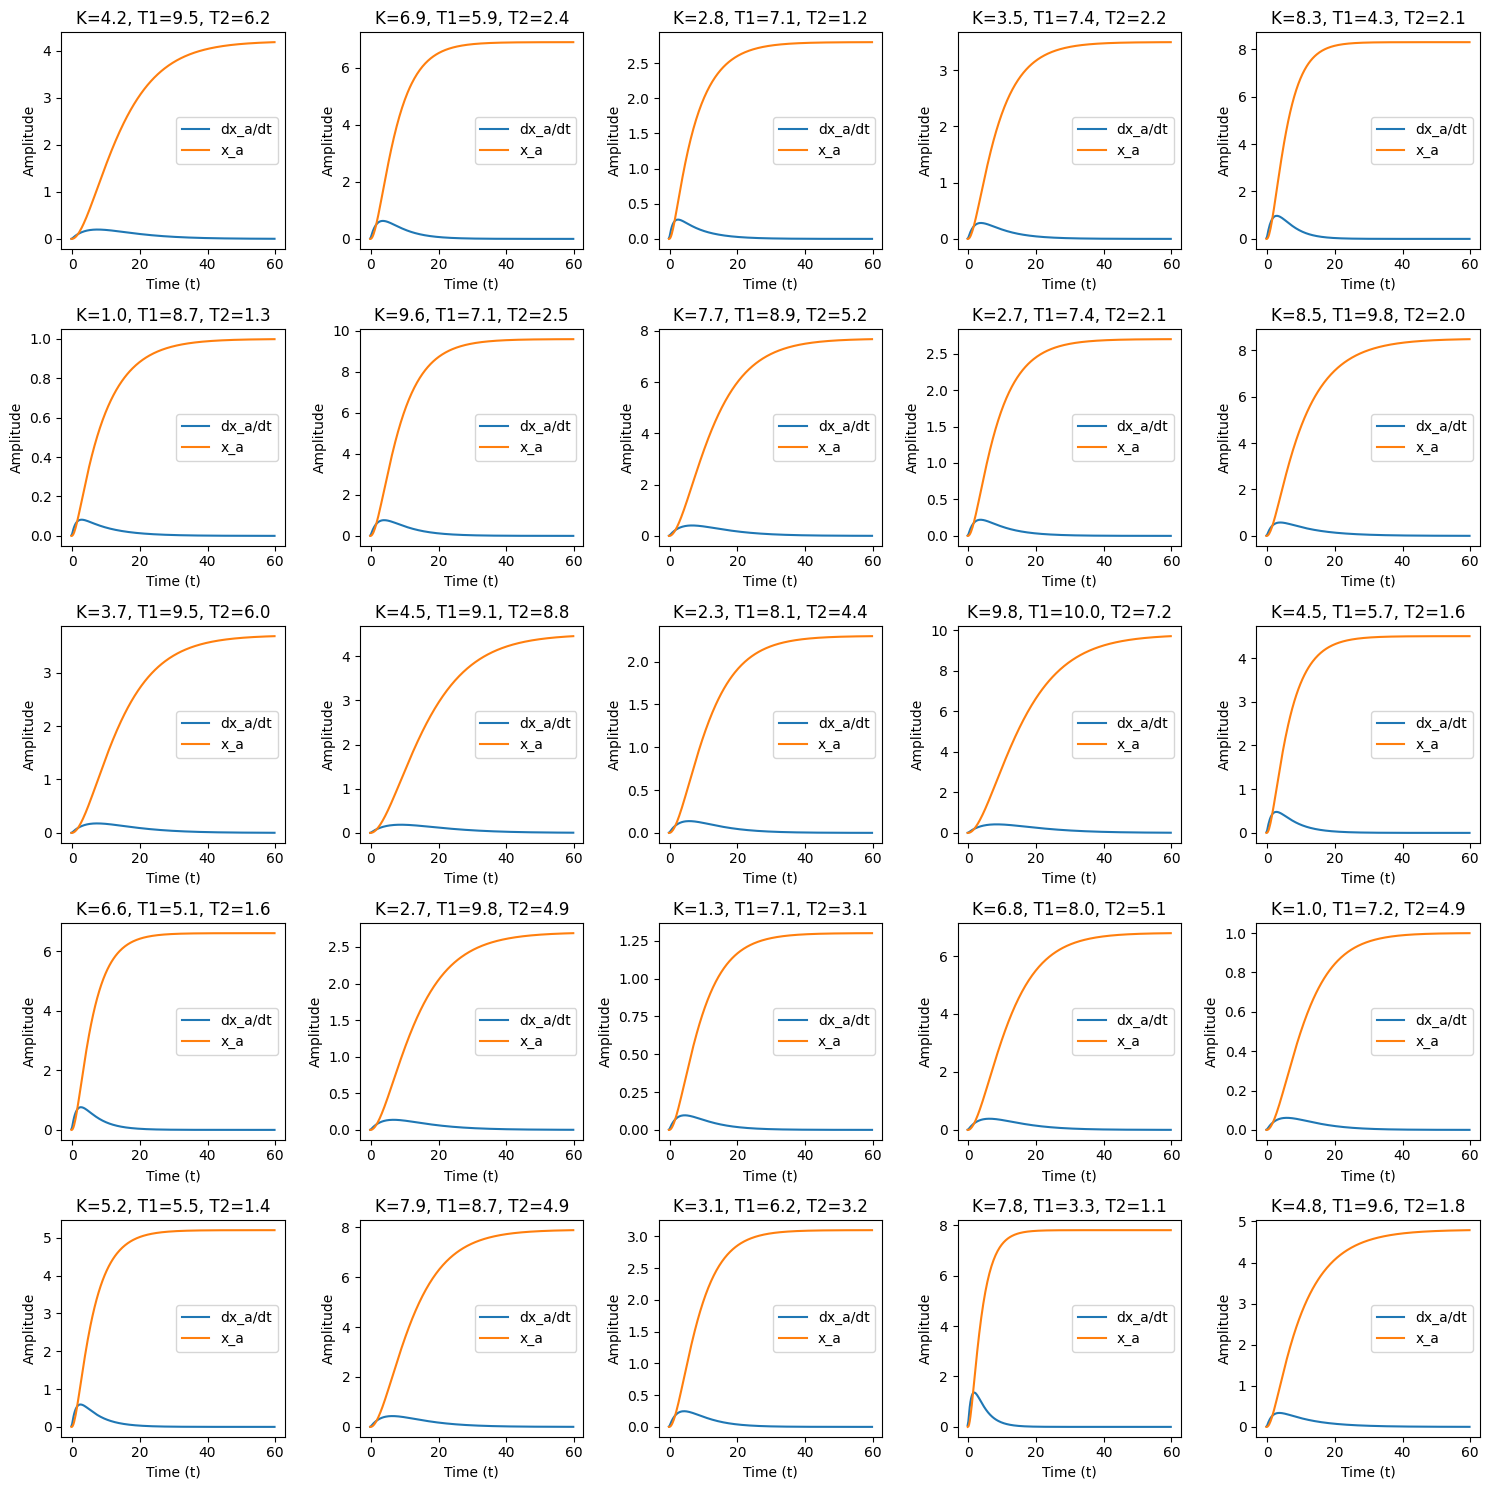

In [20]:
# ...existing code...
try:
    # Try to evaluate the variable
    X
    y
except NameError:
    X = np.load('/content/drive/MyDrive/X.npy')
    y = np.load('/content/drive/MyDrive/y.npy')

responses = X[0:25]
fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(15,15))
for i,ax in enumerate(axes.flatten()):
    t = responses[i][:, 2]
    da_dt = responses[i][:, 0]
    x_a = responses[i][:, 1]
    K = y[i][0]
    T1 = y[i][1]
    T2 = y[i][2]
    ax.plot(t, da_dt, label='dx_a/dt')
    ax.plot(t, x_a, label='x_a')
    ax.set_title(f'K={K}, T1={T1}, T2={T2}')
    ax.legend()
    ax.set_xlabel('Time (t)')
    ax.set_ylabel('Amplitude')

plt.tight_layout() # Adjust subplot params for a tight layout
plt.show() # Display the figure

### Parameters

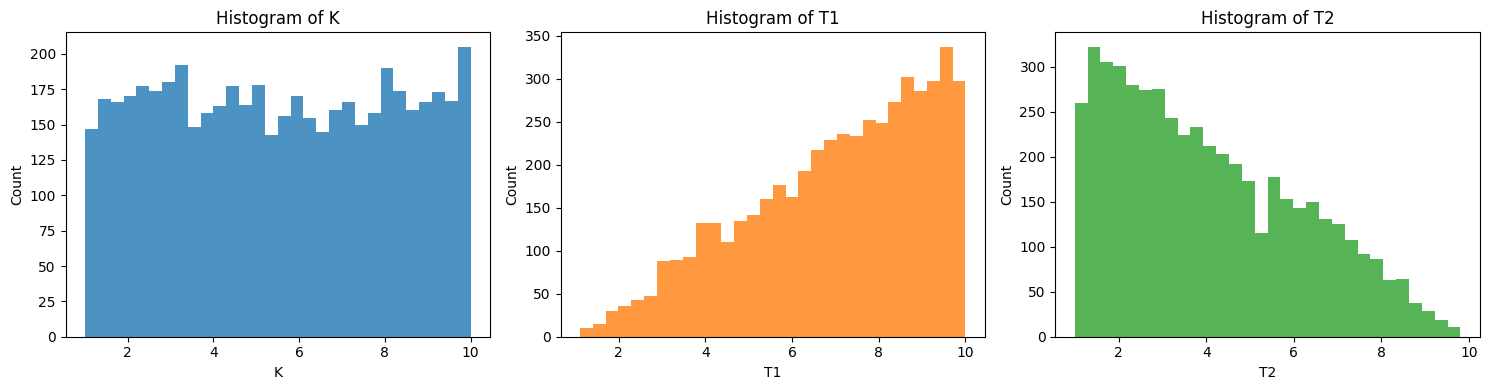

In [5]:
import numpy as np
import matplotlib.pyplot as plt

y = np.asarray(y, dtype=float)  # ensure numeric array, shape (N,3)

labels = ['K', 'T1', 'T2']
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for i, ax in enumerate(axes):
    ax.hist(y[:, i], bins=30, color=f'C{i}', alpha=0.8)
    ax.set_title(f'Histogram of {labels[i]}')
    ax.set_xlabel(labels[i])
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

### Distributions

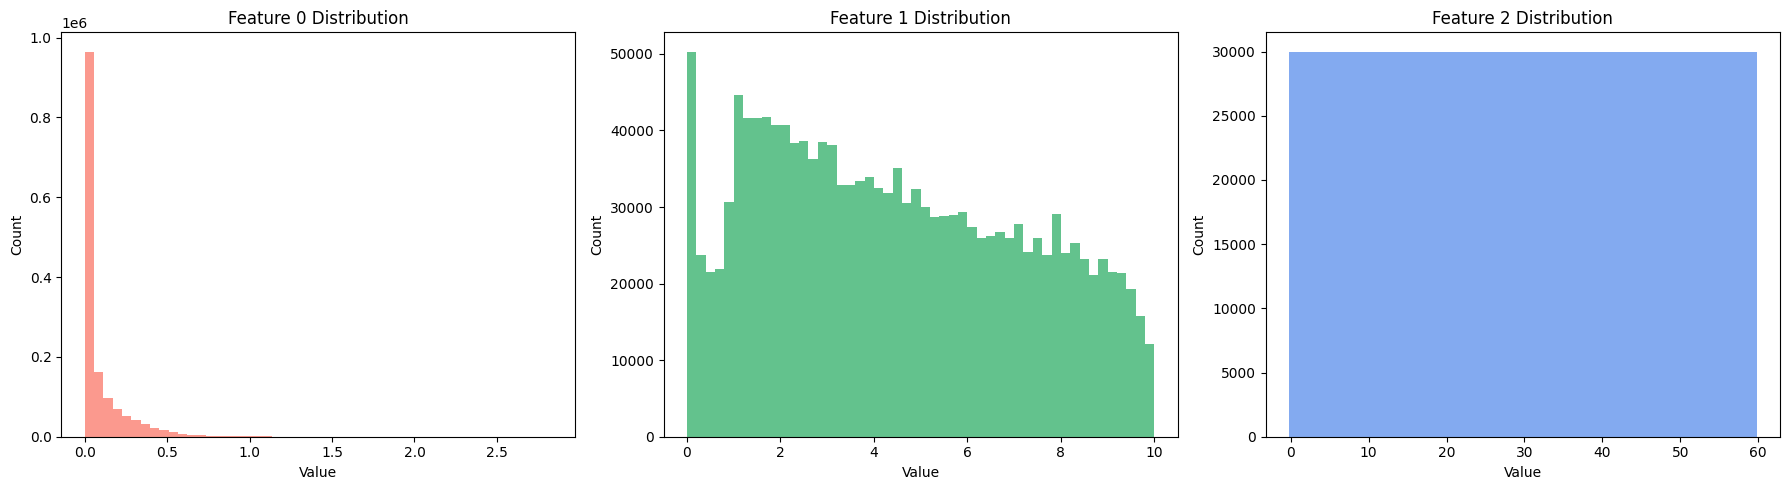

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['salmon', 'mediumseagreen', 'cornflowerblue']
labels = ['Feature 0: dx_a /dt', 'Feature 1: x_a', 'Feature 2: t']

for i in range(0,3):
  feat = X[:,:,i].flatten()
  # print(feat) # Commenting out print to avoid large output
  axes[i].hist(feat, bins=50, color=colors[i], alpha=0.8)
  axes[i].set_title(f'{labels[i]} Distribution')
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### TRAINING MODEL



In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

random_state = 42
tf.keras.utils.set_random_seed(random_state)
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

if len(physical_devices) > 0:
    print(f"Device Name: {physical_devices[0].name}")
else:
    print("⚠️ No GPU found. Training will run on CPU.")


Num GPUs Available:  1
Device Name: /physical_device:GPU:0


### Preprocessing
The reason for preprocessing is as follows:
Our T1 & T2 & K can have a different range of values
Neural networks don't understand physical units; they only see the size of raw numbers. If you mix large values with tiny ones, the network's math is entirely dominated by the big numbers, and it will completely ignore the small ones. Scaling simply strips away the units and forces every variable into the exact same numerical range so the network pays equal attention to all of them.

In [58]:
#X_xa = X[:, : , 1:3] # Corrected: Ensure X_xa remains 3D (samples, timesteps, features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Reshape X_train and X_test for StandardScaler
# StandardScaler expects a 2D array: (n_samples, n_features)
# Here, each 'sample' will be a single time step from all experiments, so we flatten the first two dimensions.
num_samples_train, time_steps, num_features = X_train.shape
X_train_reshaped = X_train.reshape(-1, num_features)

num_samples_test, _, _ = X_test.shape
X_test_reshaped = X_test.reshape(-1, num_features)

# Initialize and fit StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_reshaped) # Fit on training data only

# Transform both training and testing data
X_train_scaled_reshaped = scaler.transform(X_train_reshaped)
X_test_scaled_reshaped = scaler.transform(X_test_reshaped)

# Reshape back to original 3D shape (num_samples, time_steps, num_features) for Conv1D
X_train_scaled = X_train_scaled_reshaped.reshape(num_samples_train, time_steps, num_features)
X_test_scaled = X_test_scaled_reshaped.reshape(num_samples_test, time_steps, num_features)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(f"Original X shape: {X.shape}")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Original X shape: (10000, 300, 3)
X_train_scaled shape: (8000, 300, 3)
X_test_scaled shape: (2000, 300, 3)
y_train shape: (8000, 3)
y_test shape: (2000, 3)


### Convolutional Neural Network (CNN)

In [59]:
inputs = Input(shape=(300, 3))
# --- Start Branching ---
# Branch 1: Fast (Microscope)
x = Conv1D(filters=32, kernel_size=8, padding='same', activation='relu')(inputs)
x = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x)

#x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
# 3. Output Layer
# Dense(3) matches your request for 3 regression targets
outputs = Dense(3, activation='linear')(x)

# 4. Finalize the Model
model = Model(inputs=inputs, outputs=outputs)

# 5. Compile
optimizer_lr_adjusted = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer_lr_adjusted, loss='mse',metrics = ['r2_score'] )
# 6. Check your architecture
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 300, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 300, 32)        │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 300, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │     2,457,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,505,571 (9.56 MB)

 Trainable params: 2,505,571 (9.56 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:


# 1. Set up Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',  # Watch the validation loss
    patience=30,         # Wait 15 epochs after it stops improving before killing it
    restore_best_weights=True # Automatically roll back to the best weights when stopped
)

# 2. Set up Model Checkpoint
checkpoint = ModelCheckpoint(
    filepath='best_system_model.keras',
    monitor='val_loss',
    save_best_only=True, # ONLY overwrite the file if the model got better
    verbose=1            # Prints a message when it saves
)

history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=500, batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop, checkpoint],
                    verbose=1)

Epoch 1/500
196/200 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4349 - r2_score: 0.5567
Epoch 1: val_loss improved from inf to 0.11963, saving model to best_system_model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4301 - r2_score: 0.5616 - val_loss: 0.1196 - val_r2_score: 0.8811
Epoch 2/500
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1078 - r2_score: 0.8899
Epoch 2: val_loss improved from 0.11963 to 0.07700, saving model to best_system_model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1077 - r2_score: 0.8900 - val_loss: 0.0770 - val_r2_score: 0.9235
Epoch 3/500
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0704 - r2_score: 0.9280
Epoch 3: val_loss improved from 0.07700 to 0.05082, saving model to best_system_model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0703 - r2_score: 0.9282 - val_loss: 0.0508 - val_r2_score: 0.9495
Epoch 4/500
193/200 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0514 - r2_score: 0.9475
Epoch 4: val_loss improved fr

## SAVING MODEL GOOGLE DRIVE

In [62]:
# This mounts your Google Drive to the Colab virtual machine
drive.mount('/content/drive')
save_path = '/content/drive/MyDrive/pt2.keras'

# Save your fully trained model
model.save(save_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Displaying Results

In [61]:
try:
  model
except NameError:
  print("Model not found. Loading from Drive...")
  from tensorflow.keras.models import load_model
  model = load_model('/content/drive/MyDrive/pt2.keras')
#loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
results = model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
loss = results[0]
r2_score = results[1]
print(f"Test Loss: {loss:.4f}")
print(f"Test R2 Score: {r2_score:.4f}")
#print(f"Test MAE: {mae:.4f}")
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0025 - r2_score: 0.9974
Test Loss: 0.0025
Test R2 Score: 0.9975
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


## SHOW SYSTEMS

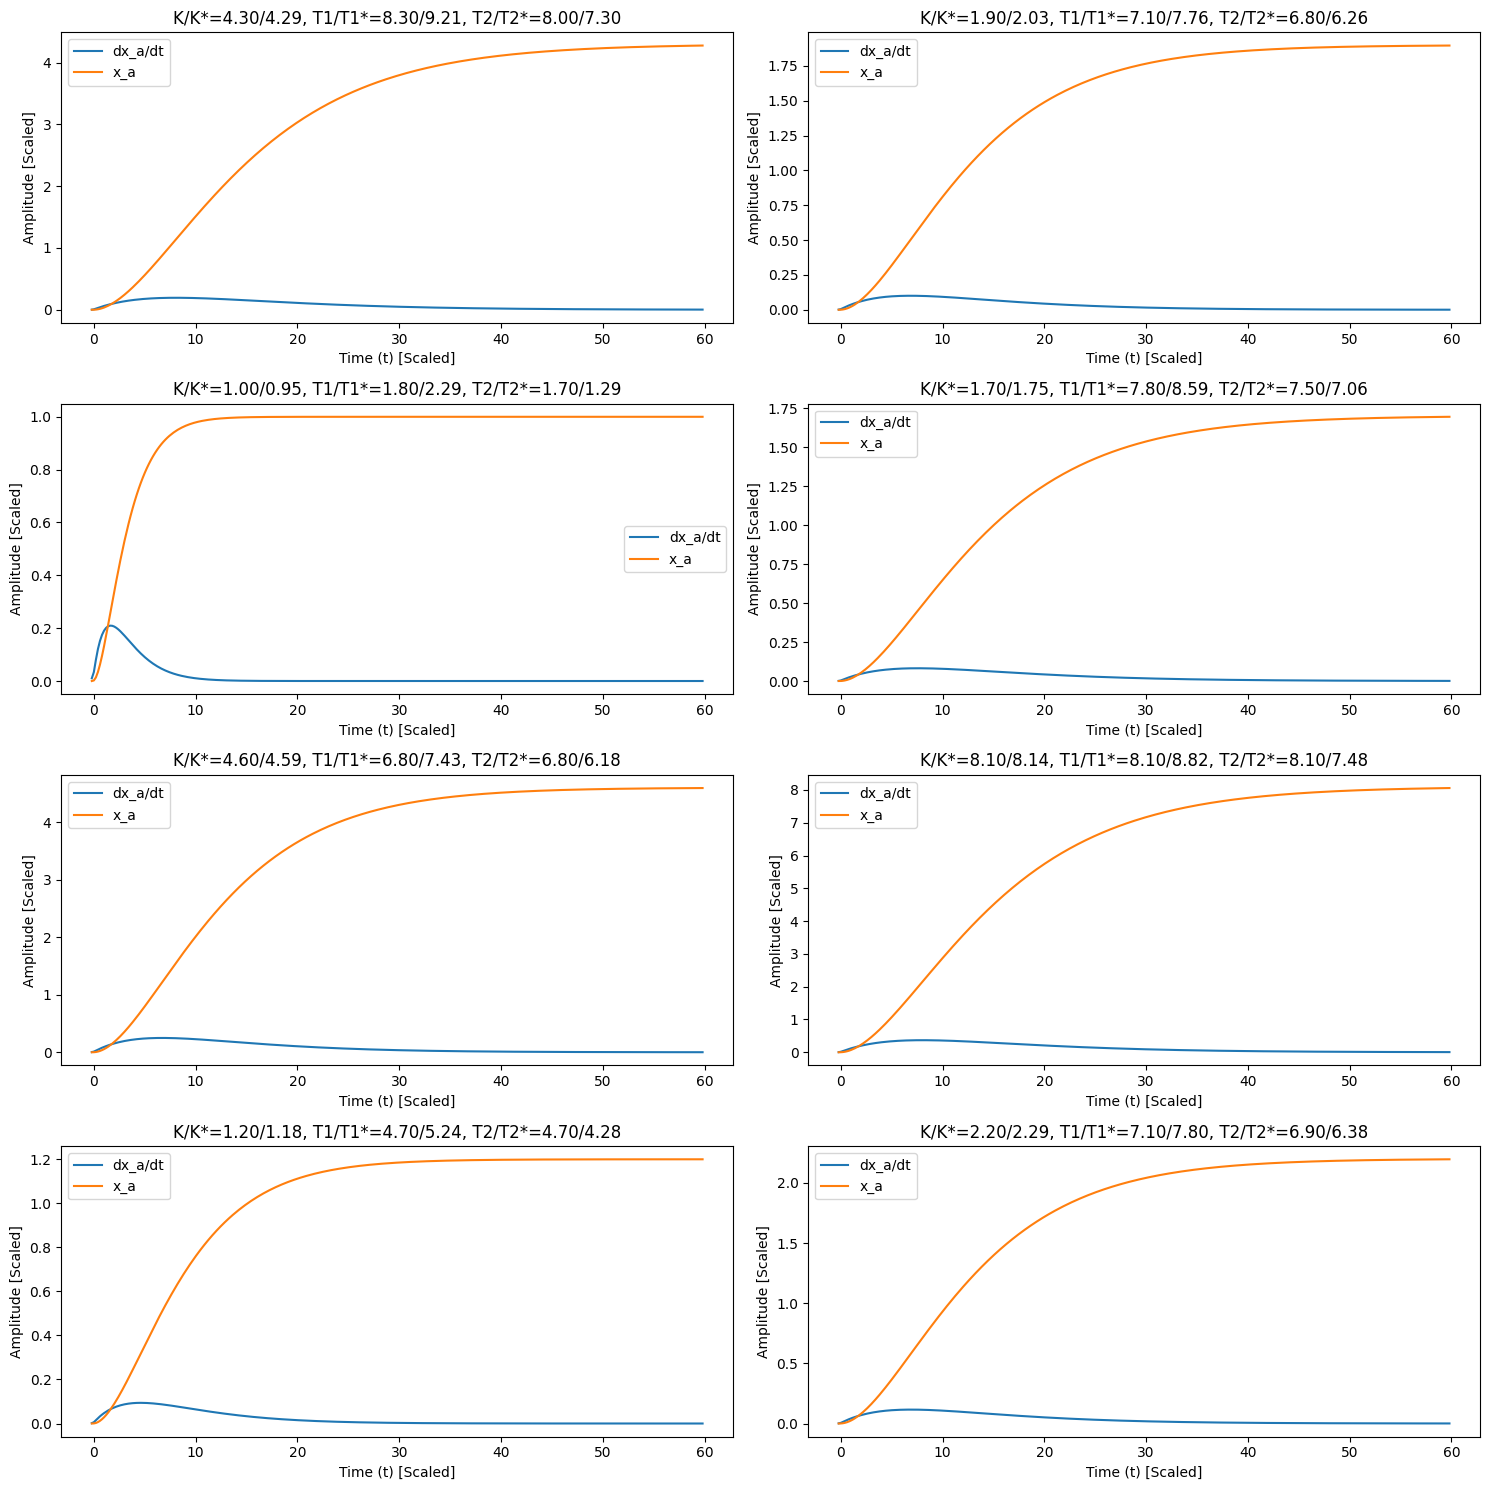

In [53]:
def plot_systems(indexes):
  num_plots = len(indexes)
  if num_plots == 0:
      print("No indexes provided to plot.")
  else:
      # Determine subplot grid dimensions more robustly
      if num_plots == 1:
          nrows = 1
          ncols = 1
      elif num_plots < 2: # Assuming a single row for up to 5 plots
          nrows = 1
          ncols = num_plots
      else: # More than 5 plots, use 5 columns
          ncols = 2
          nrows = (num_plots + ncols - 1) // ncols # Ceiling division

      fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))

      # Ensure 'axes' is always an iterable array (e.g., a 1D numpy array or list of Axes objects)
      if num_plots == 1:
          # If only one subplot, plt.subplots returns a single Axes object, not an array.
          # Wrap it in a list to make it iterable for the loop.
          axes_iterable = [axes]
      else:
          # For multiple subplots, axes is typically a numpy array (possibly 2D).
          # Flatten it to iterate over individual Axes objects easily.
          axes_iterable = axes.flatten()

      for idx in range(num_plots):
          i = indexes[idx]
          current_ax = axes_iterable[idx] # Use the current Axes object

          # These are scaled values from X_test_scaled
          t_data = X_test[i][:, 2]
          da_dt_data = X_test[i][:, 0]
          x_a_data = X_test[i][:, 1]

          # Inverse transform y_pred_scaled values to get actual K, T1, T2 for the title
          y_pred_unscaled_single = y_scaler.inverse_transform(y_pred_scaled[i].reshape(1, -1))[0]
          K_val = y_test[i][0]
          T1_val = y_test[i][1]
          T2_val = y_test[i][2]
          K_val_pred = y_pred_unscaled_single[0]
          T1_val_pred = y_pred_unscaled_single[1]
          T2_val_pred = y_pred_unscaled_single[2]
          current_ax.plot(t_data, da_dt_data, label='dx_a/dt')
          current_ax.plot(t_data, x_a_data, label='x_a')
          title = f'K/K*={K_val:.2f}/{K_val_pred:.2f}'
          title += f', T1/T1*={T1_val:.2f}/{T1_val_pred:.2f}'
          title += f', T2/T2*={T2_val:.2f}/{T2_val_pred:.2f}'
          current_ax.set_title(title)
          current_ax.legend()
          current_ax.set_xlabel('Time (t) [Scaled]') # Added [Scaled] to indicate data is scaled
          current_ax.set_ylabel('Amplitude [Scaled]') # Added [Scaled] to indicate data is scaled

      plt.tight_layout() # Adjust subplot params for a tight layout
      plt.show() # Display the figure

indexes = [257, 850, 517, 717, 541, 401,693,12]
plot_systems(indexes)

## RESULTS K

In [23]:
import pandas as pd

results_K = pd.DataFrame({
    'K_DIFF' : y_actual[:, 0] - y_pred[:, 0],
    'K_DIFF_%' : (100*(y_actual[:, 0] - y_pred[:, 0]) / y_actual[:, 0] ),
    'K_ACTUAL': y_actual[:, 0],
    'K_PRED' : y_pred[:, 0],
})
display(results_K)

,K_DIFF,K_DIFF_%,K_ACTUAL,K_PRED
0,-0.035132,-0.399223,8.8,8.835132
1,0.035272,0.587861,6.0,5.964728
2,-0.242470,-3.730312,6.5,6.742470
3,-0.042560,-2.239991,1.9,1.942560
4,0.062589,2.158252,2.9,2.837411
...,...,...,...,...
995,0.002165,0.029653,7.3,7.297835
996,0.044788,1.599560,2.8,2.755212
997,0.053693,2.237207,2.4,2.346307
998,0.059347,2.472794,2.4,2.340653


## RESULTS T1

In [56]:
import pandas as pd
results_T1 = pd.DataFrame({
    'T1_DIFF' : y_actual[:, 1] - y_pred[:, 1],
    'T1_DIFF_%' : 100*(y_actual[:, 1] - y_pred[:, 1]) / y_actual[:, 1],
    'T1_ACTUAL' : y_actual[:, 1],
    'T1_PRED' : y_pred[:, 1],
    'T2_ACTUAL' : y_actual[:, 2],
})

display(results_T1)


,T1_DIFF,T1_DIFF_%,T1_ACTUAL,T1_PRED,T2_ACTUAL
0,0.073748,0.784553,9.4,9.326252,8.2
1,-0.120994,-4.172213,2.9,3.020994,2.4
2,-0.589424,-49.118632,1.2,1.789424,1.0
3,-0.101103,-1.444333,7.0,7.101103,1.0
4,-0.155266,-2.587763,6.0,6.155266,3.8
...,...,...,...,...,...
995,-0.080871,-1.036811,7.8,7.880871,1.2
996,-0.440218,-5.792347,7.6,8.040218,6.5
997,-0.034903,-0.491591,7.1,7.134903,2.1
998,-0.340569,-4.006700,8.5,8.840569,7.5


## RESULTS T2

In [29]:
import pandas as pd
results_T2 = pd.DataFrame({
    'T2_DIFF' : y_actual[:, 2] - y_pred[:, 2],
    'T2_DIFF_%' : 100*(y_actual[:, 2] - y_pred[:, 2]) / y_actual[:, 2],
    'T2_ACTUAL' : y_actual[:, 2],
    'T2_PRED' : y_pred[:, 2],
    'T1_ACTUAL' : y_actual[:,1],
})

display(results_T2)

,T2_DIFF,T2_DIFF_%,T2_ACTUAL,T2_PRED,T1_ACTUAL
0,0.049286,0.601050,8.2,8.150714,9.4
1,0.041156,1.714822,2.4,2.358844,2.9
2,0.391488,39.148796,1.0,0.608512,1.2
3,-0.088821,-8.882082,1.0,1.088821,7.0
4,0.187727,4.940197,3.8,3.612273,6.0
...,...,...,...,...,...
995,-0.092229,-7.685775,1.2,1.292229,7.8
996,0.508908,7.829358,6.5,5.991092,7.6
997,0.067208,3.200399,2.1,2.032792,7.1
998,0.245653,3.275375,7.5,7.254347,8.5


## Error Distributions

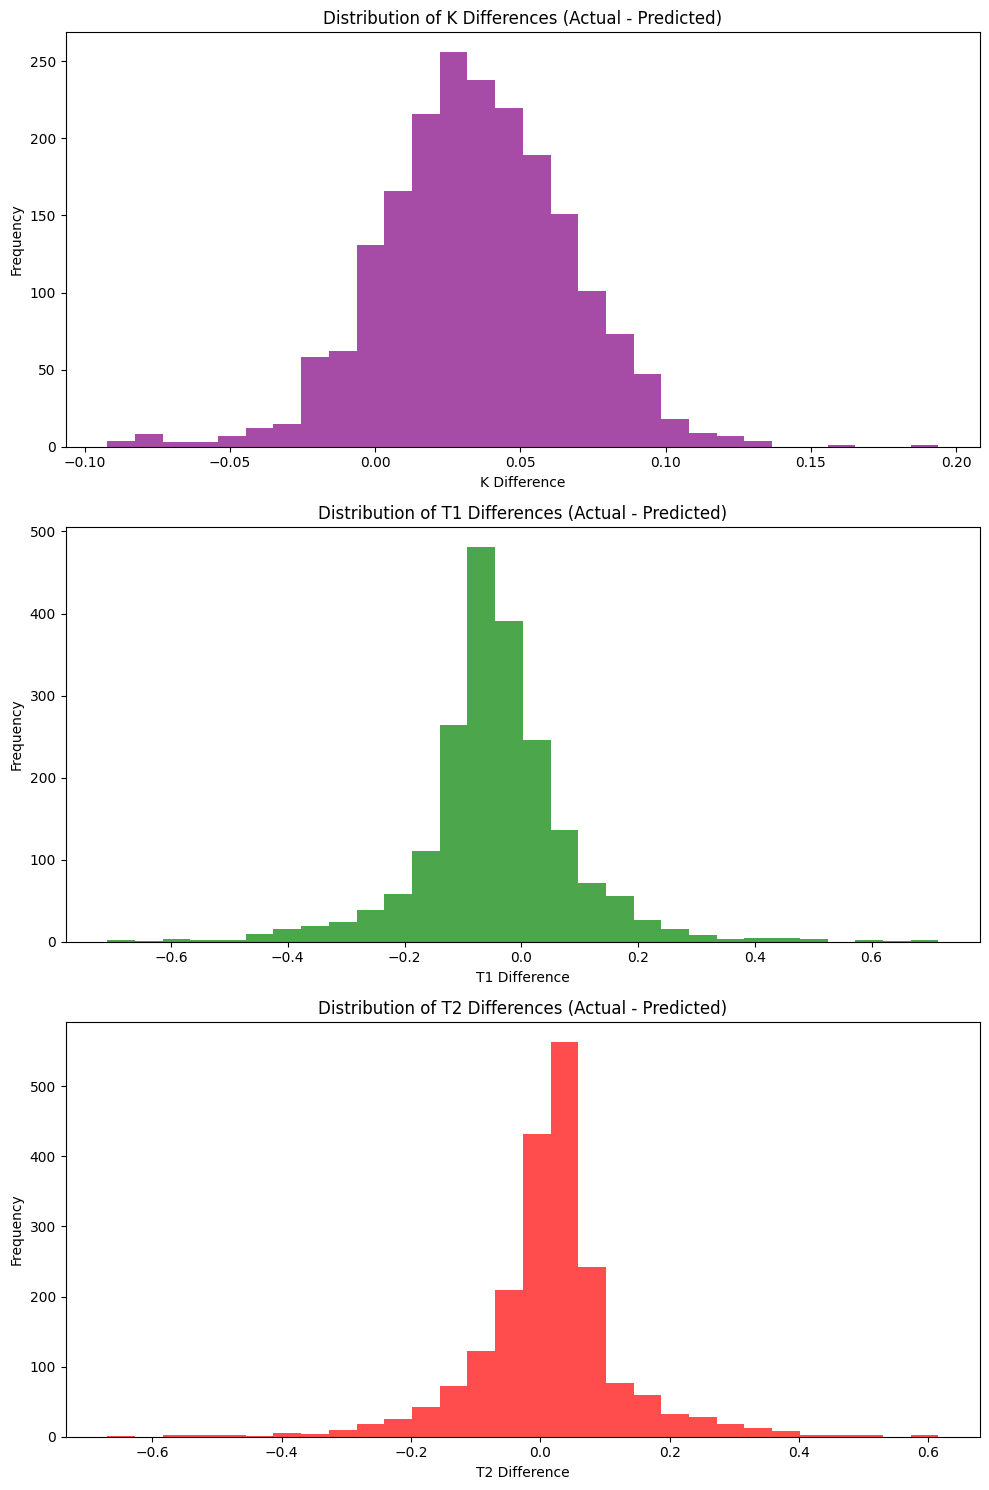

In [63]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    'K_DIFF' : y_actual[:, 0] - y_pred[:, 0],
    'T1_DIFF' : y_actual[:, 1] - y_pred[:, 1],
    'T2_DIFF' : y_actual[:, 2] - y_pred[:, 2],
})
fig_diff, axes_diff = plt.subplots(3, 1, figsize=(10, 15))

# K_DIFF distribution
axes_diff[0].hist(results_df['K_DIFF'], bins=30, color='purple', alpha=0.7)
axes_diff[0].set_title('Distribution of K Differences (Actual - Predicted)')
axes_diff[0].set_xlabel('K Difference')
axes_diff[0].set_ylabel('Frequency')

# T1_DIFF distribution
axes_diff[1].hist(results_df['T1_DIFF'], bins=30, color='green', alpha=0.7)
axes_diff[1].set_title('Distribution of T1 Differences (Actual - Predicted)')
axes_diff[1].set_xlabel('T1 Difference')
axes_diff[1].set_ylabel('Frequency')

# T2_DIFF distribution
axes_diff[2].hist(results_df['T2_DIFF'], bins=30, color='red', alpha=0.7)
axes_diff[2].set_title('Distribution of T2 Differences (Actual - Predicted)')
axes_diff[2].set_xlabel('T2 Difference')
axes_diff[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Deeper analysis

## T1 & T2

The model seems to have higher error on the time constants the closer they are together.

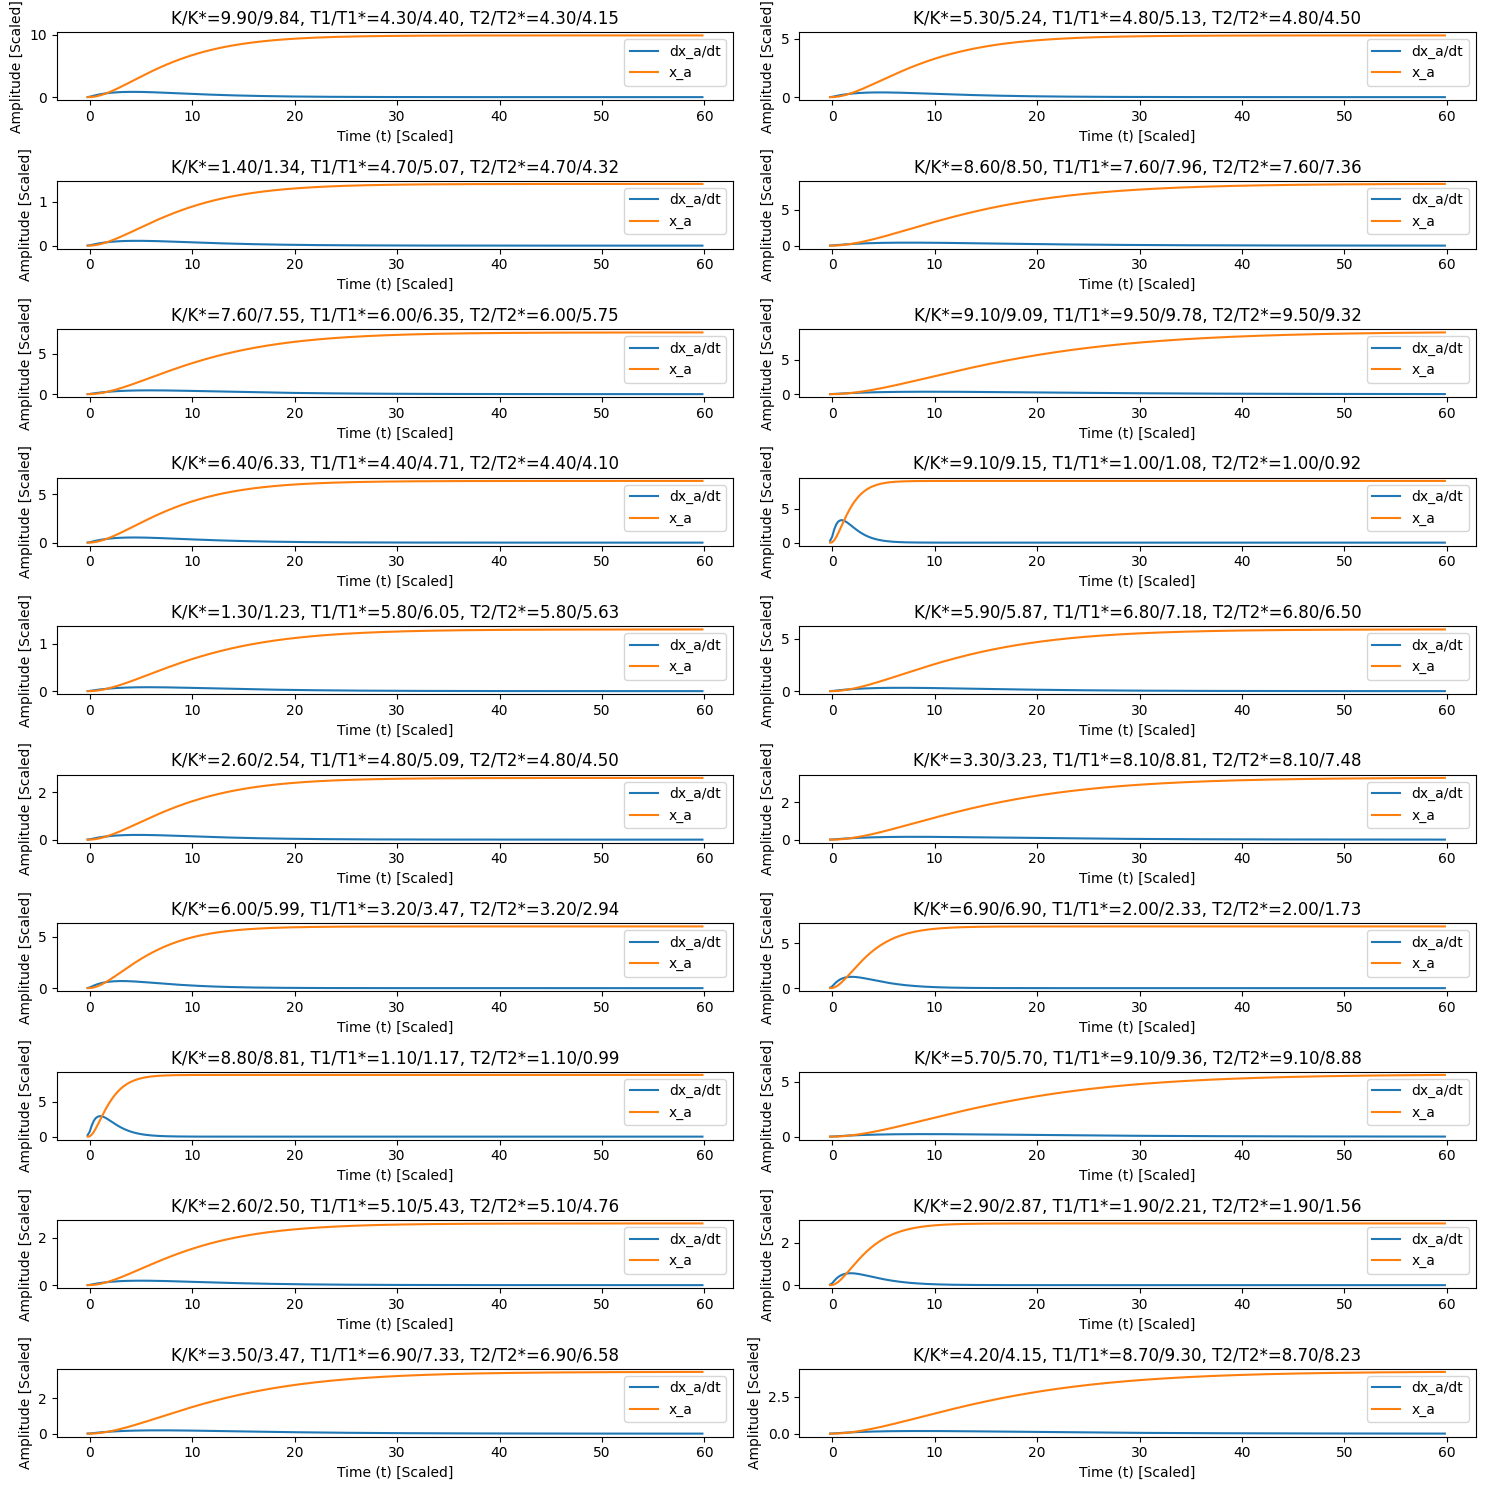

[   0 1948 1904 ... 1732 1051  911]


In [64]:
systems = np.argsort(y_test[:, 1] - y_test[:, 2])
plot_systems(systems[:20])
print(systems)



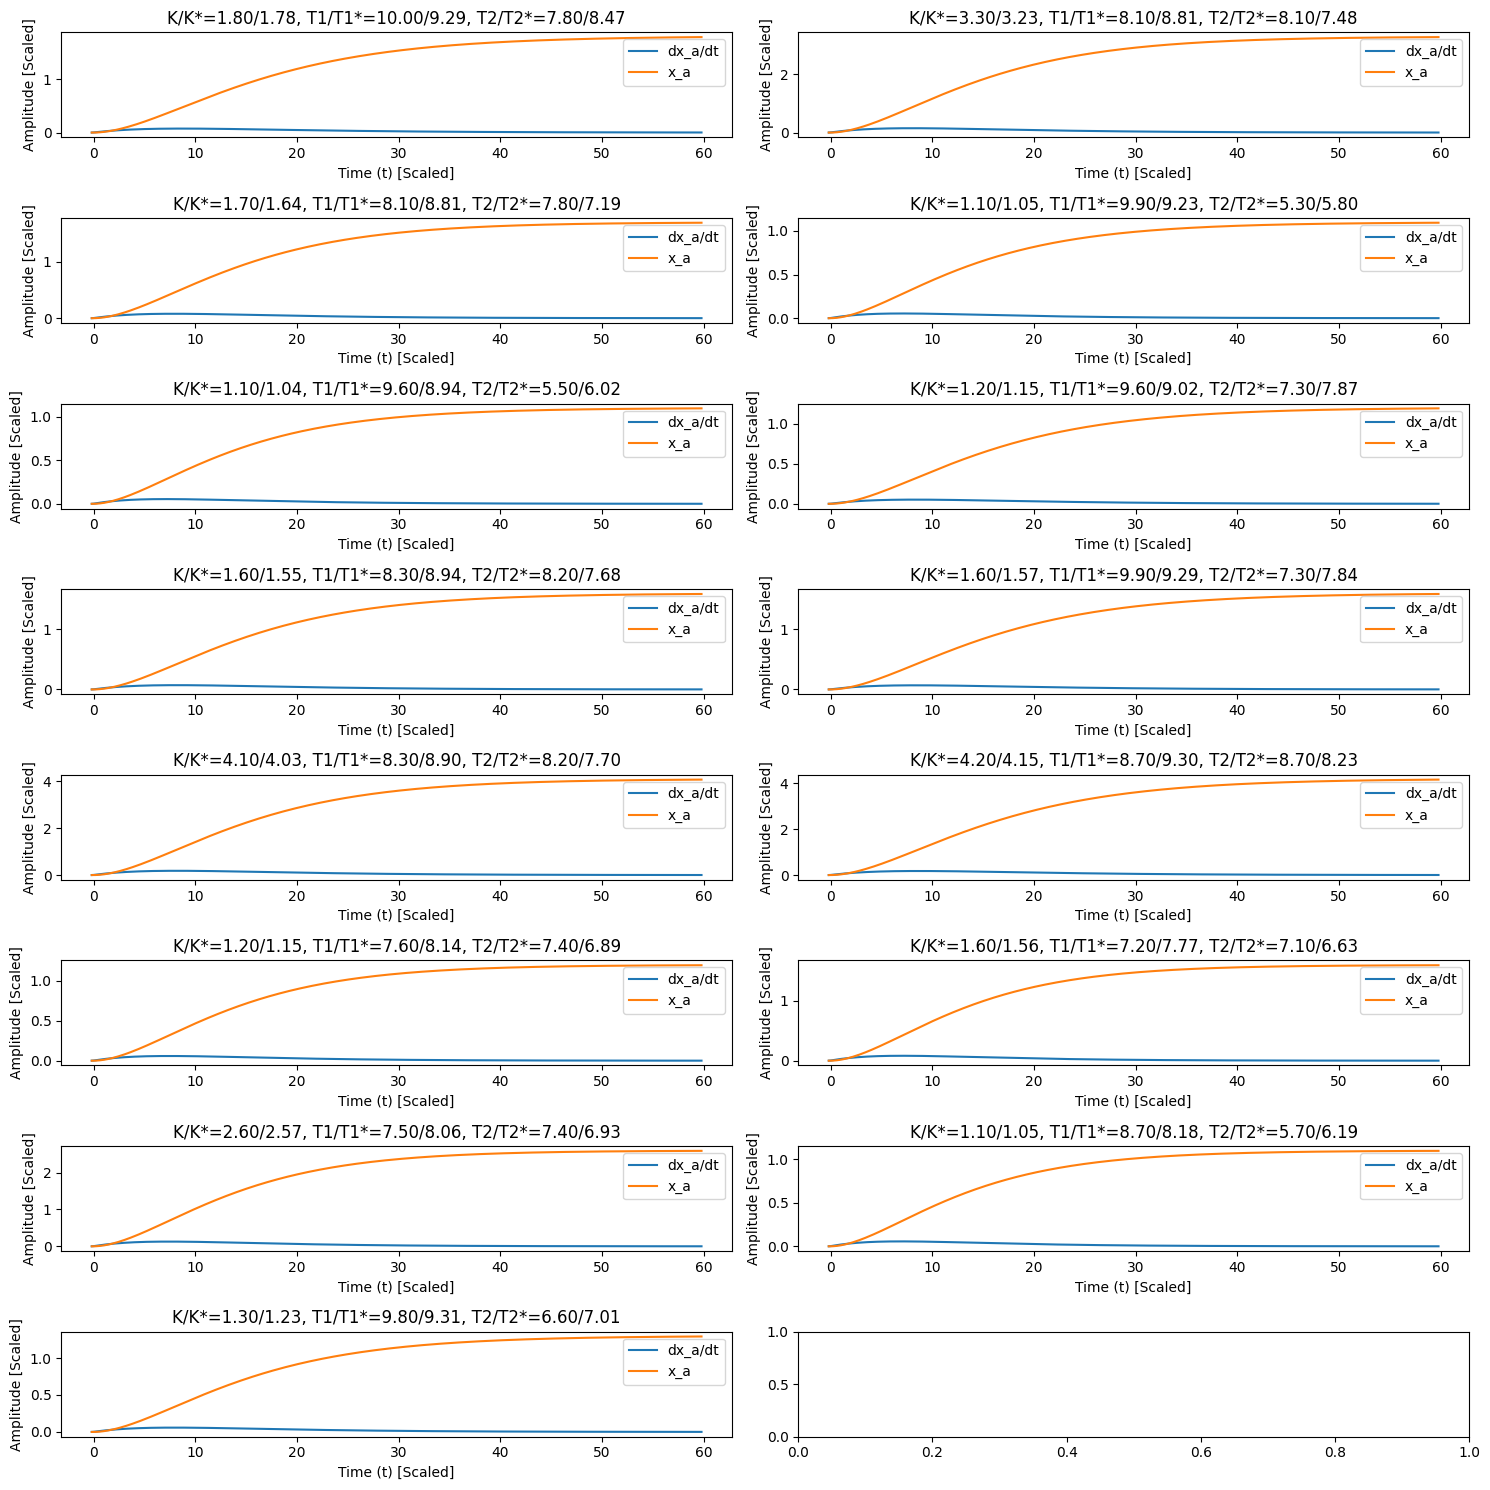

,K_DIFF,T1_DIFF,T2_DIFF,abs_err
0,0.061332,-0.099920,0.147967,0.309220
1,0.046714,-0.064345,-0.010774,0.121834
2,0.054316,-0.067352,0.030929,0.152597
3,0.048029,-0.033531,0.058963,0.140523
4,0.015661,-0.031642,-0.061615,0.108918
...,...,...,...,...
1995,0.030746,-0.004859,0.002074,0.037678
1996,0.012733,0.047092,-0.013687,0.073513
1997,0.075779,-0.254998,0.246795,0.577572
1998,0.053777,-0.043857,0.013474,0.111108


In [65]:
error_results = pd.DataFrame({
    'K_DIFF' : y_actual[:, 0] - y_pred[:, 0],
    'T1_DIFF' : y_actual[:, 1] - y_pred[:, 1],
    'T2_DIFF' : y_actual[:, 2] - y_pred[:, 2],
})
error_results['abs_err'] = np.abs(error_results['K_DIFF']) + np.abs(error_results['T1_DIFF']) + np.abs(error_results['T2_DIFF'])
highest_err = np.argsort(-1*error_results['abs_err'])
plot_systems(highest_err.values[:15])
display(error_results)
